# __Task -16 (KNN , K-means , SVM)__

In [107]:
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix


from sklearn.neighbors import KNeighborsClassifier

__IMPORTING, CLEANING AND REMOVING OUTLIERS OF DATA__

In [108]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [110]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [111]:
df.age.fillna(value= df['age'].mean(), inplace=True)

C:\Users\baigs\AppData\Local\Temp\ipykernel_16188\90929559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(value= df['age'].mean(), inplace=True)


In [112]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: ylabel='age'>

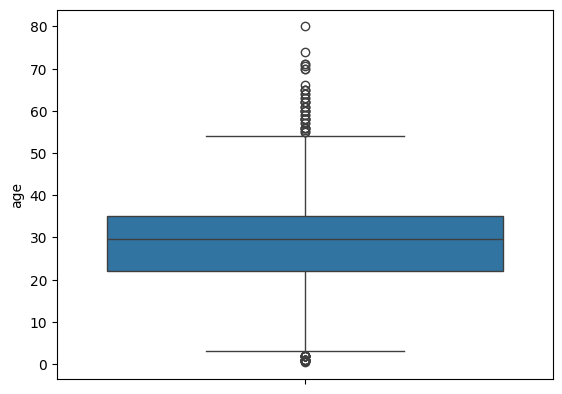

In [113]:
sns.boxplot(data= df, y=df['age'] )

In [114]:
df = df[(df['age'] > 13 ) & (df['age'] < 33)]

<Axes: ylabel='age'>

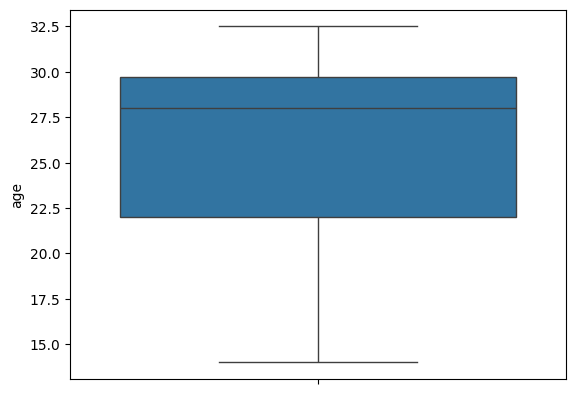

In [115]:
sns.boxplot(data= df, y=df['age'] )

<Axes: ylabel='fare'>

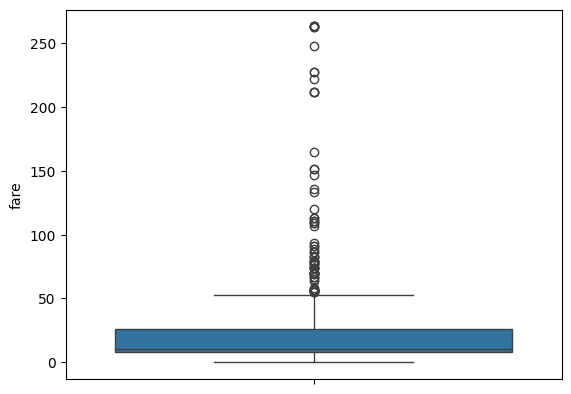

In [116]:
sns.boxplot(data=df, y = df['fare'])

In [117]:
df = df[(df['fare']<20)]

<Axes: ylabel='fare'>

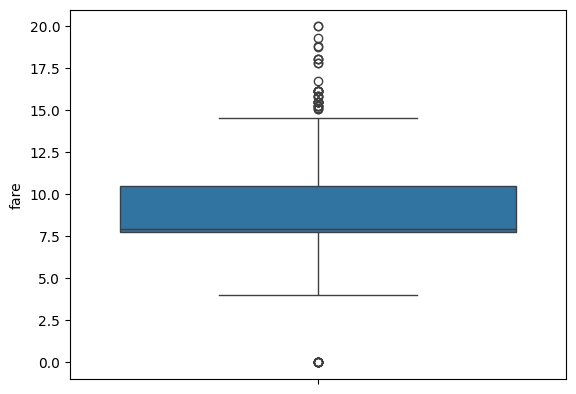

In [118]:
sns.boxplot(data=df, y = df['fare'])

In [119]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [120]:
X = pd.get_dummies(X, columns=['sex'])

In [121]:
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.000000,1,0,7.2500,False,True
2,3,26.000000,0,0,7.9250,True,False
5,3,29.699118,0,0,8.4583,False,True
8,3,27.000000,0,2,11.1333,True,False
12,3,20.000000,0,0,8.0500,False,True


# __KNN__
 Simple yet powerful supervised machine learning algorithm used for both classification and regression tasks. It's based on the principle that similar things exist in close proximity.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [124]:
y_pred = model.predict(X_test)

__EVALUATION METRICS__

In [125]:
# Accuracy Score
print( "Accuracy:", accuracy_score(y_test, y_pred))

# Precision Score
print( "Precision:", precision_score(y_test, y_pred))

#  F1 Score
print( "F1 Score:", f1_score(y_test, y_pred))

# Recall Score
print( "Recall Score:", recall_score(y_test, y_pred))

Accuracy: 0.7922077922077922
Precision: 0.5555555555555556
F1 Score: 0.5555555555555556
Recall Score: 0.5555555555555556


# __SVM__
- Fulll Form: Support Vector Machine (SVM) 
- It is a powerful supervised machine learning algorithm primarily used for classification tasks, though it can also be employed for regression. It's renowned for its ability to handle complex, high-dimensional data and achieve high accuracy.

In [126]:
from sklearn.svm import SVC

In [127]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

__EVALUATION__

In [128]:
# Accuracy Score
print( "Accuracy:", accuracy_score(y_test, y_pred))

# Precision Score
print( "Precision:", precision_score(y_test, y_pred))

#  F1 Score
print( "F1 Score:", f1_score(y_test, y_pred))

# Recall Score
print( "Recall Score:", recall_score(y_test, y_pred))

#  Confusion Metrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion metrix: ', cm)

Accuracy: 0.7662337662337663
Precision: 0.0
F1 Score: 0.0
Recall Score: 0.0
Confusion metrix:  [[59  0]
 [18  0]]


c:\Users\baigs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# __K - MEANS__
- K-Means is a popular unsupervised machine learning algorithm used for partitioning data into k clusters.
- The goal is to group similar data points together, creating clusters where members are as similar as possible within the cluster and as different as possible from members of other clusters.

In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [136]:
df1 = df[['age', 'fare']]

In [137]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to the numerical data
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=42)

In [138]:
# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [139]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

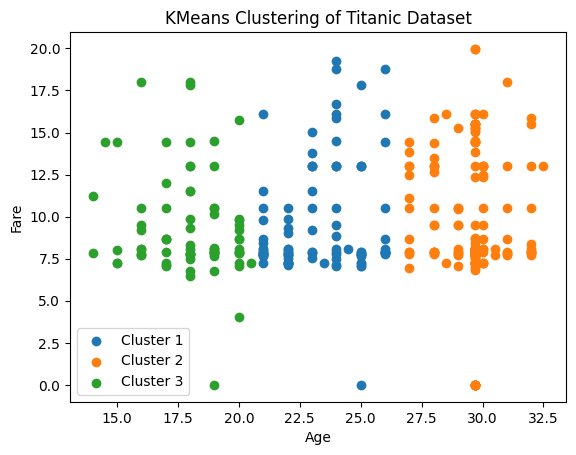

In [146]:
# Ploting clusters
for cluster in np.unique(cluster_labels):
    plt.scatter(df1[cluster_labels == cluster]['age'], 
                df1[cluster_labels == cluster]['fare'],
                label=f'Cluster {cluster + 1}')
    

plt.title('KMeans Clustering of Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()